In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
acquisitions_df = pd.read_csv("../clean/acquisitions_final.csv").drop('Unnamed: 0', axis = 1).dropna()

In [3]:
rounds_df = pd.read_csv("../raw/rounds.csv", encoding = 'ISO-8859-1').drop('Unnamed: 16', axis = 1).dropna()
rounds_df.rename(columns = lambda x: x.strip(), inplace = True)

In [4]:
rounds_df['raised_amount_usd'] = rounds_df['raised_amount_usd'].apply(lambda x: x.replace(',', '').strip())
rounds_df['raised_amount_usd'] = rounds_df['raised_amount_usd'].astype(int)

In [5]:
test_df = rounds_df.groupby(['company_name']).agg({'raised_amount_usd': 'sum'}).reset_index()

In [6]:
final_df = acquisitions_df.merge(test_df, left_on='company_name', right_on='company_name')

In [7]:
# final_df.raised_amount_usd.describe()

In [8]:
# final_df.price_amount.describe()

In [9]:
plot_df = final_df[(final_df['raised_amount_usd'] >= 1e6) & (final_df['price_amount'] >= 3e7)
                  & (final_df['raised_amount_usd'] <= 1e8) & (final_df['price_amount'] <= 1e9)]

In [10]:
plot_df = plot_df[plot_df['acquired_year'] >= 2007]

(-18500000.01517661, 1000000000.0)

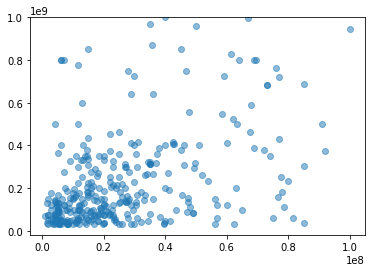

In [11]:
plt.scatter(plot_df.raised_amount_usd, plot_df.price_amount, alpha = 0.5)
plt.ylim(top = 1e9)

In [13]:
plot_df['price_amount'] = plot_df['price_amount'] / 1000000
plot_df['raised_amount_usd'] = plot_df['raised_amount_usd'] / 1000000

In [14]:
plot_df

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,...,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,acquired_year,price_amount,price_currency_code,raised_amount_usd
0,/organization/170-systems,170 Systems,|Software|,Software,USA,MA,Boston,Bedford,/organization/kofax,Kofax,...,CA,Anaheim,Irvine,2009-09-08,2009-09,2009-Q3,2009.0,43.0,USD,14.000000
1,/organization/41st-parameter,41st Parameter,|Security|,Security,USA,CA,SF Bay Area,San Jose,/organization/experian,Experian,...,CA,Anaheim,Costa Mesa,2013-10-01,2013-10,2013-Q4,2013.0,324.0,USD,34.270000
2,/organization/5min,5min Media,|Education|Video|Games|,Video,USA,NY,New York City,New York,/organization/aol,AOL,...,NY,New York City,New York,2010-09-28,2010-09,2010-Q3,2010.0,65.0,USD,12.500000
3,/organization/aardvark,Aardvark,|Search|,Search,USA,CA,SF Bay Area,San Francisco,/organization/google,Google,...,CA,SF Bay Area,Mountain View,2010-02-11,2010-02,2010-Q1,2010.0,50.0,USD,5.250000
4,/organization/accertify,Accertify,|Fraud Detection|Credit Cards|Security|,Security,USA,IL,Chicago,Itasca,/organization/americanexpress,American Express,...,NY,New York City,New York,2010-11-01,2010-11,2010-Q4,2010.0,150.0,USD,6.431124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,/organization/worklight,Worklight,|Mobile|,Mobile,USA,NY,New York City,New York,/organization/ibm,IBM,...,NY,New York City,Armonk,2012-01-31,2012-01,2012-Q1,2012.0,70.0,USD,17.100000
486,/organization/xobni,Xobni,|Software|,Software,USA,CA,SF Bay Area,San Francisco,/organization/yahoo,Yahoo!,...,CA,SF Bay Area,Sunnyvale,2013-07-08,2013-07,2013-Q3,2013.0,48.0,USD,41.660000
488,/organization/xtellus,Xtellus,|Hardware + Software|,Hardware + Software,USA,NJ,Newark,Morris Plains,/organization/oclaro,Oclaro,...,CA,SF Bay Area,San Jose,2009-12-18,2009-12,2009-Q4,2009.0,33.0,USD,8.000000
492,/organization/zep-solar,Zep Solar,|Renewable Energies|Solar|Clean Technology|,Clean Technology,USA,CA,SF Bay Area,San Rafael,/organization/solarcity,SolarCity,...,CA,SF Bay Area,San Mateo,2013-10-09,2013-10,2013-Q4,2013.0,158.0,USD,10.571182


In [15]:
plot_df.to_csv('../clean/scatterplot.csv')